### 와디즈 (22333) 데이터 전처리 과정

* 요약
    - "0630_wadizDB_최종.db"의 데이터 사용
    - idx 재정렬, nkey 컬럼 드롭
    - 중복 잉여값 총 145개 ('ntitle'완전 똑같은 것 기준)
    - '앵콜'이 들어간 데이터 총 3340개, 중복 잉여값 제외하면 3195 종류의 앵콜제품이 있다고 볼 수 있음
    - '앵콜'이라는 글자가 들어간 데이터 'encore'컬럼 추가: 있으면 1, 없으면 0
    - 'ntitle'과 'ncontent'에서 '앵콜'이라는 글자 삭제


* 모델에 쓰일 데이터프레임 준비 종류 구상
    1. fdf -> 'ntitle' 중복된 데이터 그대로 유지 (유의미한 가중치를 주는 중복 데이터일 수 있기 때문)
    2. rfdf -> 'ntitle' 중복 데이터 제거
    


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns

dbname = '../kpd/20210726_newDB.db'
with sqlite3.connect(dbname) as conn:
    cur = conn.cursor()
    sql = 'select * from wadiznew order by idx asc '
    qry = cur.execute(sql)
    desc = qry.description
    res = qry.fetchall()
desc = [d[0]for d in desc]
df = pd.DataFrame(data=res, columns=desc)

print(len(df))
df.head()

AttributeError: module 'numpy' has no attribute 'ndarray'

In [3]:
# EDA를 위한 전처리
# idx 재정렬, nkey 칼럼 삭제
edf = df.reset_index()
edf = edf.drop(['idx','nkey'], axis=1)
edf = edf.rename({'index':'idx'}, axis=1).set_index('idx')
edf.head()

NameError: name 'df' is not defined

In [4]:
edf.info()

NameError: name 'edf' is not defined

In [5]:
# 카테고리 피쳐 확인
for i, value in enumerate(edf['ncategory'].unique()):
    print(i+1, '.', value)

edf['ncategory'].value_counts()

NameError: name 'edf' is not defined

In [5]:
# 타이틀 확인 (중복 있음)
title = edf['ntitle'].value_counts()
d = dict(title)
d

{'내 치아가 하얀게 아니라고? 본격 치아미백 프로젝트 [화이티 화이트닝겔]': 6,
 '세상의 모든 커피 이야기의 시작. 커피 맵(COFFEE MAP) 포스터': 5,
 '[앵콜] 월드베스트캣리터, 옥수수알갱이로 만든 고양이모래': 4,
 "[앵콜] 심플은 정답이 아니다 '가방의 본질을 재해석 하다' 프라임백팩": 4,
 "[7천만원 앵콜] 양치질 혁명! 아이들이 좋아하는 '마약치약'": 3,
 '남자의 소중이는 3D, 그런데 팬티는 납작하다? [빌랩 리얼 3D 팬티]': 3,
 '<팬톤 파워뱅크> 15W 고속멀티무선충전+거치대+디자인을 모두 갖추다!': 3,
 '[앵콜] 동전, 지폐, 분리기능OK, 카드18개 강력수납 [싹쓰리 지갑]': 3,
 '이가격에 나올 향수가 아닌데': 3,
 '[앵콜] 향으로 덮지 않고 실내 악취와 유해 성분 원천 제거, 스멜탄': 3,
 '프로젝트 원알엠 - 비인기스포츠후원': 3,
 '[앵콜]나랑 평생 같이 가자~ 들고만 다녀도 엣지있는 나만의 인생우산!': 3,
 '[숨은 3cm의 키를 찾아라]세상 간편 목 견인 <하루 10분 넥클>': 3,
 '여기에 침대,책상,책장,옷장이 다들어간다고? 공간활용 끝판왕 [벙커침대]': 3,
 '추억을 담는 7 in 1 촬영 디바이스 : 셀디': 3,
 '근육통? 참지 마세요! 작지만 강한 근육통 완화 패치 [패인팔팔패스]': 3,
 '[5.0점앵콜/평생보증] 평생 착용할 반지의 품격 "베이직 다이아몬드링"': 2,
 '[앵콜] "저승사자"도 아직 모르는 신제품 !! (풀리)': 2,
 '[앵콜] 여행필수품 "트래블백 버디" 간편, 안전, 안심 신박템!': 2,
 '여성을 위한 시뮬럿 다이아 총 4캐럿 세트, 101번 커팅의 하트앤플라워': 2,
 '<글로벌15억펀딩> 옷장을 통째로 삼킨 괴물캐리어, 짐싸기는 이제 5초컷': 2,
 '[앵콜] 콜드브루의 계절! 핸들키트로 진화된 <뉴 아소부 콜드브루메이커>': 2,
 '단순한 기록을 넘어, 시간을 관리하고 삶을 바꾸는 플래너': 2,
 '세

In [6]:
# 제목 중복 여부 딕셔너리 리스트로 정리
l = list(d.values())
#print(l, end='')

# 제목 중복값들 개수 리스트로 정리
dup_list = []
for i in l:
    if i >=2:
        dup_list.append(i)
print(dup_list)

# 제목 중복종류 개수
print('중복 종류 개수:', len(dup_list))

# 제목 중복 값 데이터 총 개수
dup_count = 0
for i in dup_list:
    dup_count += i
print('중복값 개수:', dup_count)

# 제목 기준 Unique값을 남긴다면 삭제해야할 개수
print('삭제 가능한 중복값 개수:', dup_count - len(dup_list))

[6, 5, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
중복 종류 개수: 122
중복값 개수: 267
삭제 가능한 중복값 개수: 145


In [7]:
# 제목이 중복된 데이터 조회 (Unique 추출을 위해 삭제할 수 있는 데이터)
dup_edf = edf[edf.duplicated('ntitle')].sort_values('ntitle')
dup_edf.head()

,ncategory,nname,ntitle,ncontent,nsupport,namount,npercent,nfund,nstart,nend,nnumofpics,ncommunity
idx,,,,,,,,,,,,
1523,테크·가전,주식회사 엘레트론,"(앵콜)글로벌 18억! 타자기 키보드 페나, 머스타드 옐로우 스페셜에디션",\n 타자기 스타일의 블루투스 무선 기계식 키보드 페나 키보드가 머스타드 옐로...,21,"3,719,800",371,"1,000,000원",2020-10-20,2020-11-02,47,1
3077,패션·잡화,핌,1만원대 갓성비로 당신의 허리에 편안함을 더해줄 <세상 편한 밴딩벨트>,"\n 조이고 불편하지만 꼭 필요했던 벨트, 이제 편하고 자유롭게 착용하세요! ...","1,045","32,002,901",3200,"1,000,000원",2020-09-16,2020-10-06,75,60
4204,패션·잡화,JUNGLE LOOK,2천만 안경인들의 필수템-탈부착 선글라스클립 정글룩 6-COLOR 패키지,\n 월화수목금토일 매일매일 클럽가는 기분! 6가지 칼라의 간편한 탈부착 편광...,94,"6,051,000",1210,"500,000원",2019-10-31,2019-11-15,40,11
5826,뷰티,어메즈힘,"4.9앵콜/임상시험 l 2분 샤워로 피지,모공까지 관리되는 #올클렌징바","\n 깨끗하게 씻고 나왔는데 2분밖에 안 지났네? 하루 200원, 2분만 샤워...",355,"11,687,900",2337,"500,000원",2020-05-22,2020-06-15,76,51
4728,패션·잡화,워크슬로우,5점만점앵콜ㅣ노트북 슬림하게 수납하자. 꼭 필요한 공간만 남긴 노트북가방,"\n 바쁜 일상에서 가방이 짐이 되어서는 안되죠, 총 19번, 7가지 스타일로...",88,"8,545,000",854,"1,000,000원",2021-04-29,2021-05-17,105,4


In [8]:
# '앵콜'이 있는 전체 데이터 개수 (방법 1)
en_edf = edf[edf['ntitle'].str.contains('앵콜')]
print("'앵콜'이 포함된 데이터 개수:", len(en_edf))

# 중복된 잉여 데이터 개수
print("중복된 잉여 데이터 개수: ", len(dup_edf))

# 중복을 제거한다면 Unique '앵콜' 제품
print("중복 제거한 '앵콜' 제품 데이터 개수: ", len(en_edf) - len(dup_edf))

'앵콜'이 포함된 데이터 개수: 3340
중복된 잉여 데이터 개수:  145
중복 제거한 '앵콜' 제품 데이터 개수:  3195


In [9]:
# encore 컬럼 추가: '앵콜'이 있으면 1, 없으면 0
edf['encore'] = edf['ntitle'].apply(lambda x: 1 if '앵콜' in x else 0)
edf.head()

,ncategory,nname,ntitle,ncontent,nsupport,namount,npercent,nfund,nstart,nend,nnumofpics,ncommunity,encore
idx,,,,,,,,,,,,,
0,테크·가전,엑타코 주식회사,[앵콜] 변기청소 단한번 설치면 평생 끝! 세균/악취/곰팡이까지 한방에~,"\n 통세척 구조로, 반영구 사용할 수 있어 더욱 편리한 '자동변기 살균살균기...",925,"63,477,500",12695,"500,000원",2021-06-29,2021-07-26,74,156,1
1,테크·가전,(주)디스티팩토리,[7.9억 앵콜] 업그레이드로 돌아온 3만원 대 eufy 핸디형 청소기,\n 약 6억 5천만원 누적 펀딩을 달성한 'eufy 핸디형 청소기'가 새롭게...,"1,041","57,318,901",1910,"3,000,000원",2021-06-29,2021-07-19,110,4,1
2,테크·가전,동양라인,[2.4억 앵콜] 유인+흡입+감전! 3콤보 해충사냥꾼 듀얼 해충퇴치기!,\n 올 여름 필수템! 모기에게 물리지 않는 법은 물리기 전에 잡는 겁니다! ...,515,"24,320,400",2432,"1,000,000원",2021-06-29,2021-07-19,69,25,1
3,테크·가전,주식회사 시티파이브,[압도적평점 4.9점!] 후기로 증명된 강력한파워 ! 지코 닥터락 미니2,\n [체험 리뷰 4.9점!!] 1회 전신마사지 비용 10만원 > 지코 닥터락...,245,"21,283,900",2128,"1,000,000원",2021-06-29,2021-07-13,53,19,0
4,테크·가전,주식회사 고콘,[1195% 앵콜 펀딩] 우리 집의 안전 지킴이! 스마트 도어벨,\n '내가 집을 비우면 우리 집은 누가 지키지?'\n외출할 때마다 자꾸만 떠...,54,"4,343,800",434,"1,000,000원",2021-06-29,2021-07-07,63,4,1


In [12]:
# '앵콜'글자 ntitle, ncontent에서 제거
fdf = edf
fdf['ntitle'] = fdf['ntitle'].str.replace('앵콜', '')
fdf['ncontent'] = fdf['ncontent'].str.replace('앵콜', '')

#',', '원'을 nsupport, namount, npercent, nfund, nnumofpics, nmmunity에서 제거 및 int형식으로 변경
for i in ['nsupport', 'namount', 'npercent', 'nfund', 'nnumofpics', 'ncommunity']:
    fdf[i] = fdf[i].str.replace(',', '')
    fdf[i] = fdf[i].str.replace('원', '')
    fdf[i] = pd.to_numeric(fdf[i])

In [13]:
# 중복제거 데이터프레임 만들기
rfdf = fdf.drop_duplicates('ntitle')
len(rfdf)

22188

In [14]:
# 데이터프레임 엑셀파일로 저장 (태블로에서 시각화하기 위함)
# fdf.to_excel('fdf.xlsx', encoding='utf-8-sig')

홈리빙         3106
푸드          3072
패션·잡화       3069
뷰티          2721
테크·가전       2259
디자인소품       1820
반려동물        1738
소셜·캠페인       855
여행·레저        764
스포츠·모빌리티     758
공연·컬쳐        586
출판           492
베이비·키즈       420
클래스          306
게임·취미        300
기부·후원         41
모임            26

In [15]:
# groupby를 사용해 카테고리별 전체적인 수치 비교
fdf.groupby('ncategory').mean()

,nsupport,namount,npercent,nfund,nnumofpics,ncommunity,encore
ncategory,,,,,,,
게임·취미,254.343333,1.796749e+07,967.693333,3.466467e+06,37.580000,31.653333,0.063333
공연·컬쳐,131.201365,1.431883e+07,503.080205,6.219848e+06,29.160410,22.257679,0.049488
기부·후원,58.390244,1.831220e+06,76.268293,2.778683e+06,10.975610,14.146341,0.000000
디자인소품,129.857692,6.011883e+06,452.205495,1.870245e+06,35.456044,22.095604,0.052198
모임,23.038462,2.205269e+06,247.807692,1.705769e+06,30.115385,4.269231,0.076923
반려동물,159.266974,1.033023e+07,1006.968930,1.636049e+06,41.467204,22.018987,0.095512
베이비·키즈,116.826190,8.155627e+06,636.078571,3.280060e+06,34.771429,18.090476,0.038095
뷰티,236.076075,1.130505e+07,1626.237780,1.151801e+06,42.443219,40.218302,0.169791
소셜·캠페인,117.493567,6.833874e+06,252.360234,3.624089e+06,23.460819,20.768421,0.012865


In [17]:
# 카테고리별 데이터프레임 만들기
fdf_home = fdf[fdf['ncategory']=='홈리빙']
fdf_food = fdf[fdf['ncategory']=='푸드']
fdf_fashion = fdf[fdf['ncategory']=='패션·잡화']
fdf_beauty = fdf[fdf['ncategory']=='뷰티']
fdf_tech = fdf[fdf['ncategory']=='테크·가전']
fdf_article = fdf[fdf['ncategory']=='디자인소품']
fdf_pet = fdf[fdf['ncategory']=='반려동물']
fdf_social = fdf[fdf['ncategory']=='소셜·캠페인']
fdf_travel = fdf[fdf['ncategory']=='여행·레저']
fdf_sport = fdf[fdf['ncategory']=='스포츠·모빌리티']
fdf_curture = fdf[fdf['ncategory']=='공연·컬쳐']
fdf_publishing = fdf[fdf['ncategory']=='출판']
fdf_kid = fdf[fdf['ncategory']=='베이비·키즈']
fdf_class = fdf[fdf['ncategory']=='클래스']
fdf_game = fdf[fdf['ncategory']=='게임·취미']
fdf_donation = fdf[fdf['ncategory']=='기부·후원']
fdf_club = fdf[fdf['ncategory']=='모임']

# 앵콜 or 미앵콜 데이터프레임 만들기
fdf_encore = fdf[fdf['encore']==1]
fdf_first = fdf[fdf['encore']==0]

,ncategory,nname,ntitle,ncontent,nsupport,namount,npercent,nfund,nstart,nend,nnumofpics,ncommunity,encore
idx,,,,,,,,,,,,,
0,테크·가전,엑타코 주식회사,[] 변기청소 단한번 설치면 평생 끝! 세균/악취/곰팡이까지 한방에~,"\n 통세척 구조로, 반영구 사용할 수 있어 더욱 편리한 '자동변기 살균살균기...",925,"63,477,500",12695,"500,000원",2021-06-29,2021-07-26,74,156,1
1,테크·가전,(주)디스티팩토리,[7.9억 ] 업그레이드로 돌아온 3만원 대 eufy 핸디형 청소기,\n 약 6억 5천만원 누적 펀딩을 달성한 'eufy 핸디형 청소기'가 새롭게...,"1,041","57,318,901",1910,"3,000,000원",2021-06-29,2021-07-19,110,4,1
2,테크·가전,동양라인,[2.4억 ] 유인+흡입+감전! 3콤보 해충사냥꾼 듀얼 해충퇴치기!,\n 올 여름 필수템! 모기에게 물리지 않는 법은 물리기 전에 잡는 겁니다! ...,515,"24,320,400",2432,"1,000,000원",2021-06-29,2021-07-19,69,25,1
4,테크·가전,주식회사 고콘,[1195% 펀딩] 우리 집의 안전 지킴이! 스마트 도어벨,\n '내가 집을 비우면 우리 집은 누가 지키지?'\n외출할 때마다 자꾸만 떠...,54,"4,343,800",434,"1,000,000원",2021-06-29,2021-07-07,63,4,1
5,테크·가전,이상윤,[4차 ][누적 1억돌파 예정] 유튜버들의 필수템! 세팅 3초 컷!!,\n 장비세팅 3초. 나머지 시간은 컨텐츠에 신경쓰세요!\n공간도 확 살아납니...,33,"10,168,000",2033,"500,000원",2021-06-29,2021-07-19,72,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,소셜·캠페인,스튜디오 마인드맨션,"[] 감각을 느끼고, 감정을 통해 나를 찾는 [연결감 워크숍]","\n 나를 살게 하는 힘을 찾아갑니다. \r\n안전한 대인관계 연습장, 연결감...",26,"2,459,000",175,"1,400,000원",2019-07-31,2019-08-11,46,1,1
21627,소셜·캠페인,1004ADT,[] 유기견을 돕는 착한 케이스 1004ADT,\n 코로나로 무관심한 유기견을 돕는 케이스 1004ADT \n \n ...,29,"794,000",158,"500,000원",2020-09-11,2020-10-21,8,0,1
21725,소셜·캠페인,마리트,"[] 저소득층 아이들에게 교육을 지원,전액 기부하는 착한 후드 맨투맨",\n 저소득층아이들의 그림으로 패션상품을 제작 하고 펀딩하여 저소득층 아이들에...,10,"1,191,000",119,"1,000,000원",2019-03-04,2019-03-11,67,3,1


In [14]:
# 플로틀리 시각화 시작
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud

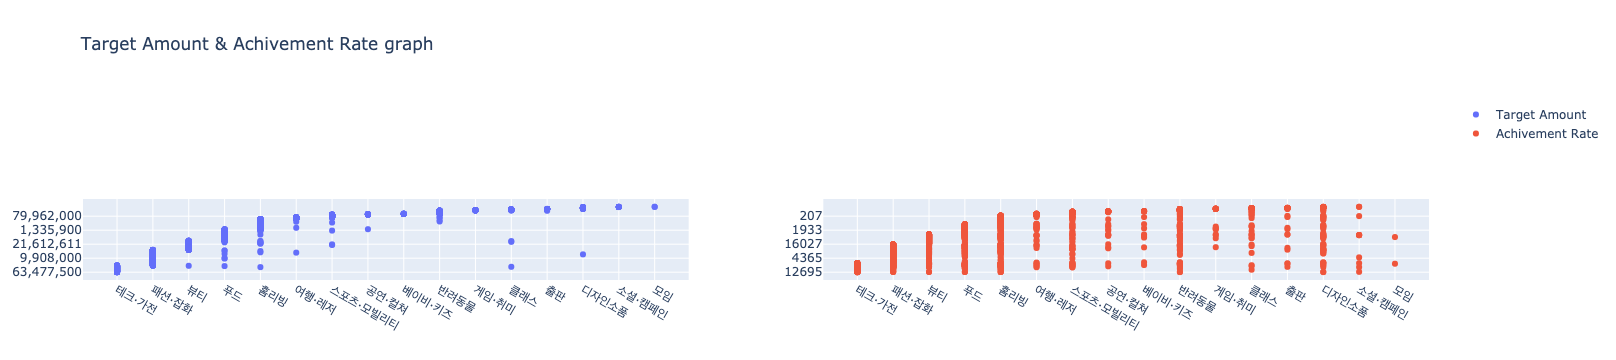

In [47]:
# 시각화용 데이터프레임 설정
gdf = fdf_encore.groupby()
df = df.groupby('ncategory', as_index=False).mean().sort_values('numeric')

# Bar Chart
import plotly.graph_objs as go

# trace 만들기
trace1 = go.Scatter(
                    x=gdf.ncategory,
                    y=gdf.namount,           
                    mode='markers',
                    name = "Target Amount"
                    )

trace2 = go.Scatter(
                    x=gdf.ncategory,
                    y=gdf.npercent,
                    mode='markers',
                    xaxis='x2',
                    yaxis='y2',
                    name = "Achivement Rate",
                    )

data = [trace1, trace2]
layout = go.Layout(
                   xaxis=dict(domain=[0, 0.45]), yaxis=dict(domain=[0, 0.45]),
                   xaxis2=dict(domain=[0.55, 1]), yaxis2=dict(domain=[0, 0.45], anchor='x2'),
                   title='Target Amount & Achivement Rate graph'
                   )
fig = go.Figure(data=data, layout=layout)
iplot(fig)